In [18]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [19]:
class Model(nn.Module):
     
    def __init__(self):
        super().__init__()
        self.stepLength = 2
        
        self.layer1 = nn.Linear(1, 32)
        self.layer2 = nn.Linear(32, 32)
        self.layer3 = nn.Linear(32, 1)
  
    def forward_DNN(self, x):    
        y = torch.tanh(self.layer1(x))
        y = torch.tanh(self.layer2(y))
        y = self.layer3(y)
     
        return y*torch.exp(-0.1*x**2)
    
    def sample(self, n):
        total = 0
        x = torch.Tensor(4*np.random.random((1,1)) - 2)
        psi_old = self.forward_DNN(x)
        
        for i in range(n):
            x_new = x + self.stepLength*torch.Tensor(2*np.random.random((1,1)) - 1)
            psi_new = self.forward_DNN(x_new)
            
            if (psi_new/psi_old)**2 > np.random.random():
                x = x_new
                psi_old = psi_new
                total += 1
            
        return x, total    

In [20]:
torch.manual_seed(42)
np.random.seed(42)
model = Model()
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(model.parameters())

### Using naive minimization of energy

In [21]:
epochs = 1000
N = 10
for epoch in tqdm(range(epochs)):
    PE_acc = 0
    P_acc = 0
    E_acc = 0
    
    for i in range(N):
    
        x = model.sample(100)[0].detach().requires_grad_()
        psi = model.forward_DNN(x)
        
        dfdx, = torch.autograd.grad(psi, x, create_graph=True)
        d2fdx2, = torch.autograd.grad(dfdx, x, create_graph=True)
        
        kinetic = -0.5*d2fdx2/psi
        potential = 0.5*x**2
        

        
        E_L = (kinetic + potential).detach()
        
        PE_acc += torch.log(psi)*E_L
        P_acc  += torch.log(psi)
        E_acc  += E_L   
    
    PE_acc /= N
    P_acc  /= N
    E_acc  /= N
        
    
    loss = 2*(PE_acc - P_acc*E_acc)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    if epoch%10 == 0: 
        print(f"epoch: {epoch}, Energy: {E_acc.item()}")

  0%|          | 2/1000 [00:00<02:19,  7.18it/s]

epoch: 0, Energy: 2.3879733085632324


  1%|          | 12/1000 [00:01<02:14,  7.35it/s]

epoch: 10, Energy: 0.8034380674362183


  2%|▏         | 22/1000 [00:02<02:04,  7.83it/s]

epoch: 20, Energy: 0.6895202398300171


  3%|▎         | 32/1000 [00:04<02:02,  7.92it/s]

epoch: 30, Energy: 1.1207497119903564


  4%|▍         | 42/1000 [00:05<02:06,  7.58it/s]

epoch: 40, Energy: 0.5874378085136414


  5%|▌         | 52/1000 [00:06<02:06,  7.50it/s]

epoch: 50, Energy: 0.44177713990211487


  6%|▌         | 62/1000 [00:08<02:03,  7.57it/s]

epoch: 60, Energy: 0.7141827344894409


  7%|▋         | 72/1000 [00:09<02:04,  7.47it/s]

epoch: 70, Energy: 1.796950340270996


  8%|▊         | 82/1000 [00:10<01:55,  7.93it/s]

epoch: 80, Energy: 0.5484917163848877


  9%|▉         | 92/1000 [00:12<02:02,  7.44it/s]

epoch: 90, Energy: 0.5468534231185913


 10%|█         | 102/1000 [00:13<01:59,  7.52it/s]

epoch: 100, Energy: 0.4767402112483978


 11%|█         | 112/1000 [00:14<01:57,  7.54it/s]

epoch: 110, Energy: 0.4656408727169037


 12%|█▏        | 122/1000 [00:16<01:57,  7.49it/s]

epoch: 120, Energy: 0.43160778284072876


 13%|█▎        | 132/1000 [00:17<01:55,  7.51it/s]

epoch: 130, Energy: 0.5229458808898926


 14%|█▍        | 142/1000 [00:18<01:53,  7.58it/s]

epoch: 140, Energy: 0.5335628390312195


 15%|█▌        | 152/1000 [00:20<01:48,  7.79it/s]

epoch: 150, Energy: 0.45251065492630005


 16%|█▌        | 162/1000 [00:21<01:49,  7.66it/s]

epoch: 160, Energy: 0.46455496549606323


 17%|█▋        | 172/1000 [00:22<01:48,  7.66it/s]

epoch: 170, Energy: 0.49191388487815857


 18%|█▊        | 182/1000 [00:23<01:41,  8.03it/s]

epoch: 180, Energy: 0.8892364501953125


 19%|█▉        | 192/1000 [00:25<01:41,  8.00it/s]

epoch: 190, Energy: 0.5019658803939819


 20%|██        | 202/1000 [00:26<01:47,  7.45it/s]

epoch: 200, Energy: 0.5249515771865845


 21%|██        | 212/1000 [00:27<01:44,  7.53it/s]

epoch: 210, Energy: 0.5442911386489868


 22%|██▏       | 222/1000 [00:29<01:44,  7.44it/s]

epoch: 220, Energy: 0.4763144552707672


 23%|██▎       | 232/1000 [00:30<01:45,  7.29it/s]

epoch: 230, Energy: 0.51313716173172


 24%|██▍       | 242/1000 [00:31<01:39,  7.61it/s]

epoch: 240, Energy: 0.5062062740325928


 25%|██▌       | 252/1000 [00:33<01:43,  7.26it/s]

epoch: 250, Energy: 0.6994587182998657


 26%|██▌       | 262/1000 [00:34<01:39,  7.40it/s]

epoch: 260, Energy: 0.5046579241752625


 27%|██▋       | 272/1000 [00:35<01:37,  7.46it/s]

epoch: 270, Energy: 0.4688011705875397


 28%|██▊       | 282/1000 [00:37<01:38,  7.25it/s]

epoch: 280, Energy: 1.183650016784668


 29%|██▉       | 292/1000 [00:38<01:29,  7.89it/s]

epoch: 290, Energy: 0.5352987051010132


 30%|███       | 302/1000 [00:39<01:28,  7.88it/s]

epoch: 300, Energy: 0.5750540494918823


 31%|███       | 312/1000 [00:41<01:30,  7.62it/s]

epoch: 310, Energy: 0.5226544141769409


 32%|███▏      | 322/1000 [00:42<01:26,  7.85it/s]

epoch: 320, Energy: 0.4516008794307709


 33%|███▎      | 332/1000 [00:43<01:27,  7.61it/s]

epoch: 330, Energy: 0.47653189301490784


 34%|███▍      | 342/1000 [00:45<01:26,  7.59it/s]

epoch: 340, Energy: 0.5109672546386719


 35%|███▌      | 352/1000 [00:46<01:25,  7.57it/s]

epoch: 350, Energy: 0.571732223033905


 36%|███▌      | 362/1000 [00:47<01:24,  7.56it/s]

epoch: 360, Energy: 0.6477504968643188


 37%|███▋      | 372/1000 [00:49<01:23,  7.52it/s]

epoch: 370, Energy: 0.5936523675918579


 38%|███▊      | 382/1000 [00:50<01:20,  7.64it/s]

epoch: 380, Energy: 0.8308579325675964


 39%|███▉      | 392/1000 [00:51<01:20,  7.57it/s]

epoch: 390, Energy: 0.5132960081100464


 40%|████      | 402/1000 [00:52<01:19,  7.49it/s]

epoch: 400, Energy: 0.48761725425720215


 41%|████      | 412/1000 [00:54<01:14,  7.87it/s]

epoch: 410, Energy: 0.4832076132297516


 42%|████▏     | 422/1000 [00:55<01:18,  7.38it/s]

epoch: 420, Energy: 0.49467697739601135


 43%|████▎     | 432/1000 [00:56<01:16,  7.39it/s]

epoch: 430, Energy: 0.5044000744819641


 44%|████▍     | 442/1000 [00:58<01:12,  7.65it/s]

epoch: 440, Energy: 0.46977466344833374


 45%|████▌     | 452/1000 [00:59<01:15,  7.28it/s]

epoch: 450, Energy: 0.549365222454071


 46%|████▌     | 462/1000 [01:00<01:09,  7.77it/s]

epoch: 460, Energy: 0.47815728187561035


 47%|████▋     | 472/1000 [01:02<01:05,  8.02it/s]

epoch: 470, Energy: 0.5133741497993469


 48%|████▊     | 482/1000 [01:03<01:12,  7.14it/s]

epoch: 480, Energy: 0.4819072186946869


 49%|████▉     | 492/1000 [01:04<01:11,  7.13it/s]

epoch: 490, Energy: 0.46591848134994507


 50%|█████     | 502/1000 [01:06<01:05,  7.55it/s]

epoch: 500, Energy: 0.47861385345458984


 51%|█████     | 512/1000 [01:07<01:04,  7.51it/s]

epoch: 510, Energy: 0.4819262623786926


 52%|█████▏    | 522/1000 [01:08<01:04,  7.43it/s]

epoch: 520, Energy: 0.5533741116523743


 53%|█████▎    | 532/1000 [01:10<01:02,  7.46it/s]

epoch: 530, Energy: 0.4826812744140625


 54%|█████▍    | 542/1000 [01:11<01:01,  7.41it/s]

epoch: 540, Energy: 0.5251373052597046


 55%|█████▌    | 552/1000 [01:12<01:00,  7.40it/s]

epoch: 550, Energy: 0.5252580642700195


 56%|█████▌    | 562/1000 [01:14<00:58,  7.50it/s]

epoch: 560, Energy: 0.5327852368354797


 57%|█████▋    | 572/1000 [01:15<00:55,  7.76it/s]

epoch: 570, Energy: 0.4944571554660797


 58%|█████▊    | 582/1000 [01:16<00:54,  7.70it/s]

epoch: 580, Energy: 0.4815092086791992


 59%|█████▉    | 592/1000 [01:18<00:54,  7.49it/s]

epoch: 590, Energy: 0.4768435060977936


 60%|██████    | 602/1000 [01:19<00:52,  7.62it/s]

epoch: 600, Energy: 0.5363004207611084


 61%|██████    | 612/1000 [01:20<00:51,  7.55it/s]

epoch: 610, Energy: 0.5568480491638184


 62%|██████▏   | 622/1000 [01:22<00:50,  7.54it/s]

epoch: 620, Energy: 0.5386423468589783


 63%|██████▎   | 632/1000 [01:23<00:48,  7.54it/s]

epoch: 630, Energy: 0.5274717211723328


 64%|██████▍   | 642/1000 [01:24<00:47,  7.58it/s]

epoch: 640, Energy: 0.48508700728416443


 65%|██████▌   | 652/1000 [01:26<00:44,  7.85it/s]

epoch: 650, Energy: 0.5365163683891296


 66%|██████▌   | 662/1000 [01:27<00:44,  7.65it/s]

epoch: 660, Energy: 0.5099522471427917


 67%|██████▋   | 672/1000 [01:28<00:42,  7.65it/s]

epoch: 670, Energy: 0.5332581996917725


 68%|██████▊   | 682/1000 [01:30<00:41,  7.60it/s]

epoch: 680, Energy: 0.5177737474441528


 69%|██████▉   | 692/1000 [01:31<00:40,  7.63it/s]

epoch: 690, Energy: 0.5251157879829407


 70%|███████   | 702/1000 [01:32<00:39,  7.63it/s]

epoch: 700, Energy: 0.5113805532455444


 71%|███████   | 712/1000 [01:33<00:38,  7.52it/s]

epoch: 710, Energy: 0.5206626653671265


 72%|███████▏  | 722/1000 [01:35<00:36,  7.57it/s]

epoch: 720, Energy: 0.5103920698165894


 73%|███████▎  | 732/1000 [01:36<00:34,  7.76it/s]

epoch: 730, Energy: 0.47817158699035645


 74%|███████▍  | 742/1000 [01:37<00:34,  7.48it/s]

epoch: 740, Energy: 0.48688507080078125


 75%|███████▌  | 752/1000 [01:39<00:33,  7.33it/s]

epoch: 750, Energy: 0.5122648477554321


 76%|███████▌  | 762/1000 [01:40<00:32,  7.39it/s]

epoch: 760, Energy: 0.4771333336830139


 77%|███████▋  | 772/1000 [01:41<00:28,  7.89it/s]

epoch: 770, Energy: 0.4947737157344818


 78%|███████▊  | 782/1000 [01:43<00:28,  7.76it/s]

epoch: 780, Energy: 0.5644923448562622


 79%|███████▉  | 792/1000 [01:44<00:25,  8.10it/s]

epoch: 790, Energy: 0.4804020822048187


 80%|████████  | 802/1000 [01:45<00:26,  7.61it/s]

epoch: 800, Energy: 0.51409912109375


 81%|████████  | 812/1000 [01:47<00:23,  7.95it/s]

epoch: 810, Energy: 0.5150984525680542


 82%|████████▏ | 822/1000 [01:48<00:23,  7.69it/s]

epoch: 820, Energy: 0.5108245611190796


 83%|████████▎ | 832/1000 [01:49<00:21,  7.84it/s]

epoch: 830, Energy: 0.4844784736633301


 84%|████████▍ | 842/1000 [01:50<00:21,  7.38it/s]

epoch: 840, Energy: 0.6139378547668457


 85%|████████▌ | 852/1000 [01:52<00:20,  7.34it/s]

epoch: 850, Energy: 0.4706387519836426


 86%|████████▌ | 862/1000 [01:53<00:17,  7.73it/s]

epoch: 860, Energy: 0.4737810492515564


 87%|████████▋ | 872/1000 [01:54<00:16,  7.83it/s]

epoch: 870, Energy: 0.43509578704833984


 88%|████████▊ | 882/1000 [01:56<00:15,  7.44it/s]

epoch: 880, Energy: 0.4412802755832672


 89%|████████▉ | 892/1000 [01:57<00:14,  7.61it/s]

epoch: 890, Energy: 0.4723877012729645


 90%|█████████ | 902/1000 [01:58<00:13,  7.38it/s]

epoch: 900, Energy: 0.49008750915527344


 91%|█████████ | 912/1000 [02:00<00:11,  7.88it/s]

epoch: 910, Energy: 0.4701453149318695


 92%|█████████▏| 922/1000 [02:01<00:09,  7.91it/s]

epoch: 920, Energy: 0.4775942265987396


 93%|█████████▎| 932/1000 [02:02<00:08,  7.60it/s]

epoch: 930, Energy: 0.5153941512107849


 94%|█████████▍| 942/1000 [02:04<00:07,  7.53it/s]

epoch: 940, Energy: 0.5648412108421326


 95%|█████████▌| 952/1000 [02:05<00:06,  7.56it/s]

epoch: 950, Energy: 0.5323014259338379


 96%|█████████▌| 962/1000 [02:06<00:04,  7.80it/s]

epoch: 960, Energy: 0.5095952749252319


 97%|█████████▋| 972/1000 [02:07<00:03,  7.87it/s]

epoch: 970, Energy: 0.5290092825889587


 98%|█████████▊| 982/1000 [02:09<00:02,  7.81it/s]

epoch: 980, Energy: 0.5309821367263794


 99%|█████████▉| 992/1000 [02:10<00:01,  7.83it/s]

epoch: 990, Energy: 0.4876035749912262


100%|██████████| 1000/1000 [02:11<00:00,  7.60it/s]


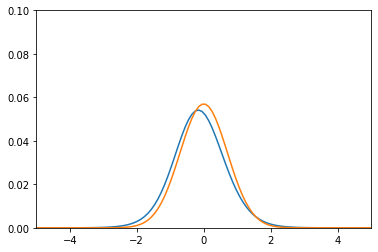

In [17]:
x_lin = torch.linspace(-5, 5, 100).reshape(100,-1)

psi1 = model.forward_DNN(x_lin)[:,0].detach().numpy()
psi2 = torch.exp(-0.5*x_lin[:,0]**2)

plt.plot(x_lin[:,0], psi1**2/np.sum(psi1**2))
plt.plot(x_lin[:,0], psi2**2/torch.sum(psi2**2))

plt.xlim((-5,5))
plt.ylim((0, 0.1))

plt.show()


In [147]:
print(model.sample(30))

(tensor([[-0.8434]]), 17)


In [96]:
N = 10000

pos = []
E = 0
for i in tqdm(range(N)):
    x = model.sample(20)[0][0,0].detach().numpy()
    pos.append(x)

100%|██████████| 10000/10000 [00:24<00:00, 407.31it/s]


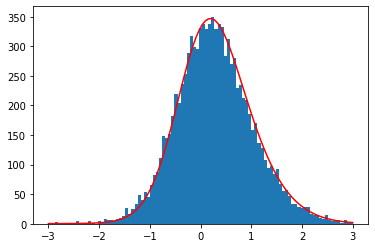

In [19]:
x_lin = torch.linspace(-3, 3, 100).reshape(100,-1)

dx = x_lin[1] - x_lin[0]

psi = model.forward_DNN(x_lin)[:,0].detach().numpy()

bins = np.linspace(-3, 3, 100)
plt.hist(pos, bins=bins)
plt.plot(x_lin[:,0], N*psi**2/np.sum(psi**2), "r")
plt.show()

## Estimating energy

In [149]:
N = 10000

E = 0
for i in tqdm(range(N)):
    x1 = model.sample(20)[0].detach().requires_grad_()
    psi1 = model.forward_DNN(x1)
        
    dfdx, = torch.autograd.grad(psi1, x1, create_graph=True)
    d2fdx2, = torch.autograd.grad(dfdx, x1, create_graph=True)
        
    kinetic1 = -0.5*d2fdx2/psi1
    potential1 = 0.5*x1**2
        

        
    E += (kinetic1 + potential1).detach()
    
E = E/N

print(E.item())

100%|██████████| 10000/10000 [00:32<00:00, 307.33it/s]

0.512307345867157


In [ ]:
x1 = torch.Tensor([[0]]).requires_grad_()
psi1 = model.forward_DNN(x1)


dfdx, = torch.autograd.grad(psi1, x1, create_graph=True)
d2fdx2, = torch.autograd.grad(dfdx, x1, create_graph=True)

print(d2fdx2/psi1)



## Testing auto grad

In [ ]:
x = torch.Tensor([3]).requires_grad_()
y = torch.Tensor([4]).requires_grad_()

f = x**3*y**2

g = f*y
print(f)


dfdx = torch.autograd.grad(g, x, create_graph=True)
print(dfdx)

d2fdx2 = torch.autograd.grad(dfdx, x, create_graph=True)

print(d2fdx2)

#d2fdx2.backward()
#print(x.grad, y.grad)

#print(dfdx)


#ddfdxdx, = torch.autograd.grad(dfdx, x, create_graph=True)
#print(ddfdxdx.grad_fn(x)[1])

In [ ]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 10)
        self.layer2 = nn.Linear(10, 1)
        
    def forward(self, x):
        y = self.layer1(x).clamp(min=0)
        y = self.layer2(y)
        return y*x

In [ ]:
torch.manual_seed(42)
model = Model()

In [ ]:
#x = torch.Tensor(np.linspace(-0.00001, 0.00001, 100)).reshape(100,-1).requires_grad_()
x = torch.Tensor([1]).requires_grad_()

f = model(x)

ddf = (model(x+0.001) + model(x-0.001) - 2*model(x))/(0.001)**2
print(ddf)

#plt.plot(f.detach().numpy())

dfdx, = torch.autograd.grad(f, x, create_graph = True)
print(dfdx)
ddfdxdx, = torch.autograd.grad(dfdx, x, create_graph = True)
print(ddfdxdx)
